In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/archive/parkinsons_disease_data.csv')

In [ ]:
# Veri Setini Bağımlı ve Bağımsız Niteliklere Ayırmak
X = df.iloc[:, 1:33].values
y = df.iloc[:, 33].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:",X_test.shape, y_test.shape)

Train set: (1578, 32) (1578,)
Test set: (527, 32) (527,)


Normalizasyon

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Karar Ağacı Modelini Eğitme

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeObject = DecisionTreeClassifier()
decisionTreeObject.fit(X_train,y_train)


DecisionTreeClassifier()

Karar Ağacı Modelini Test Etme

Tahminleri Oluştur

In [ ]:
y_pred_decisionTreeObject = decisionTreeObject.predict(X_test)

Karışıklık Matrisini Oluştur

In [ ]:
from sklearn.metrics import confusion_matrix
cm_decisionTreeObject = confusion_matrix(y_test, y_pred_decisionTreeObject)
print(cm_decisionTreeObject)

[[157  32]
 [ 31 307]]


In [ ]:
dt_test_sonuc_decisionTreeObject = decisionTreeObject.score(X_test, y_test)
print("Karar Ağacı Doğruluk (test_seti): ",round(dt_test_sonuc_decisionTreeObject,2))

Karar Ağacı Doğruluk (test_seti):  0.88


In [ ]:
print(classification_report(y_test, y_pred_decisionTreeObject))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       189
           1       0.91      0.91      0.91       338

    accuracy                           0.88       527
   macro avg       0.87      0.87      0.87       527
weighted avg       0.88      0.88      0.88       527



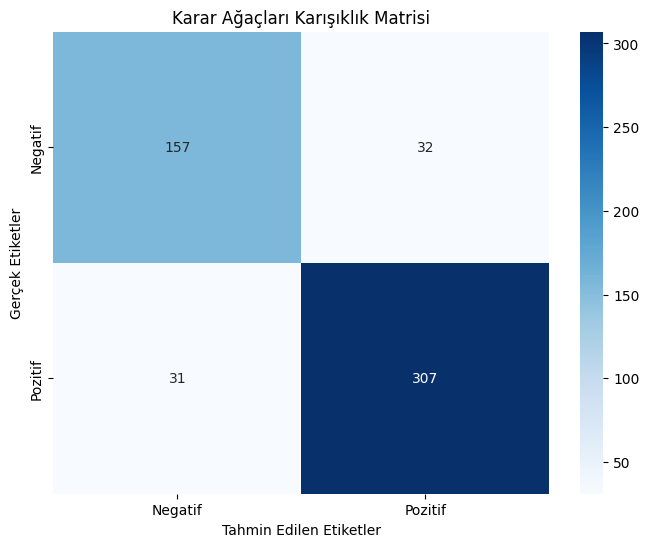

In [ ]:
# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm_decisionTreeObject, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karar Ağaçları Karışıklık Matrisi')
plt.show()

Random Forest Modeli Oluşturma

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomForestObject = RandomForestClassifier(n_estimators=10)
randomForestObject.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred_randomForestObject = randomForestObject.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_randomForestObject = confusion_matrix(y_test, y_pred_randomForestObject)
print(cm_randomForestObject)

[[148  41]
 [ 38 300]]


In [ ]:
df_test_sonuc_randomForestObject = randomForestObject.score(X_test, y_test)
print("Random Forest Doğruluk (test_seti): ",round(df_test_sonuc_randomForestObject,2))

Random Forest Doğruluk (test_seti):  0.85


In [ ]:
print(classification_report(y_test, y_pred_randomForestObject))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       189
           1       0.88      0.89      0.88       338

    accuracy                           0.85       527
   macro avg       0.84      0.84      0.84       527
weighted avg       0.85      0.85      0.85       527



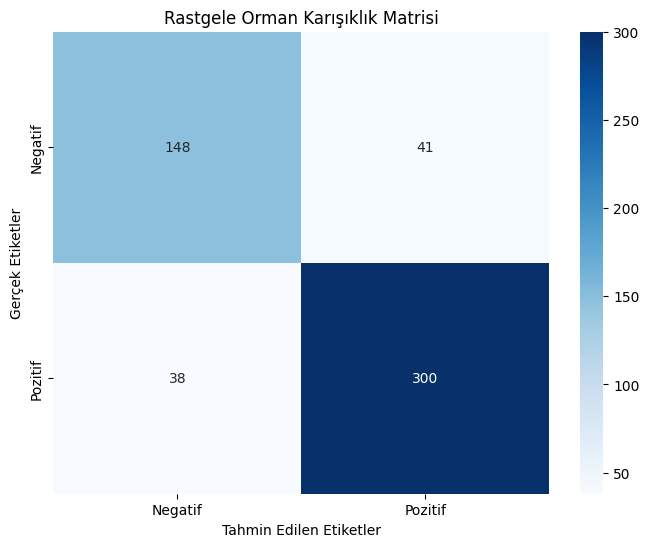

In [ ]:
# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm_randomForestObject, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Rastgele Orman Karışıklık Matrisi')
plt.show()

**Ensemble Yöntemi Uygulama**

 Öğrenme algoritmasını kullanarak birden fazla modeli eğitmek amacıyla kullanılan bir makine öğrenmesi yöntemidir. Öğrenmede hatanın başlıca ana nedenleri yanlılık , gürültü ve varyanstan kaynaklanmaktadır. Topluluk yöntemi(ensemble) bu belli başlı faktörlerin minimum seviyeye indirilmesine yardımcı olur. Bu yöntemin tasarlanma amacı makine algoritmalarının doğruluğunu ve kararlılığını geliştirmek amacıyla tasarlanmıştır.

# **Bagging (Torbalama)**
* Aynı modelin (örneğin Karar Ağacı) farklı bootstrap örneklemeleri üzerinde eğitilmesiyle oluşturulan topluluk yöntemidir. Her model bağımsız olarak eğitilir ve tahminler genelde çoğunluk oyu (sınıflandırma) veya ortalama (regresyon) ile birleştirilir.
* Kullanılan en popüler makine öğrenmesi tekniği Rastgele Orman’dır. Rastgele ormanda birden fazla karar ağacı kullanılır.
*  Bagging, model varyansını azaltmaya çalışır ve genellikle paralel olarak çalışır.

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
baggingObject = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=20)
baggingObject.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=20)

In [ ]:
y_pred_baggingObject = baggingObject.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_baggingObject = confusion_matrix(y_test, y_pred_baggingObject)
print(cm_baggingObject)

[[163  26]
 [ 17 321]]


In [ ]:
from sklearn import metrics
print("Eğitim verisi doğruluğu:", metrics.accuracy_score(y_train,baggingObject.predict(X_train)))
print("Test verisi doğruluğu:",metrics.accuracy_score(y_test,y_pred_baggingObject))

Eğitim verisi doğruluğu: 0.9683143219264893
Test verisi doğruluğu: 0.9184060721062619


DecisionTreeClassifier'ı (Karar Ağacı sınıflandırıcısı) temel alan bir topluluk modeli (ensemble method) oluşturduğunuz anlamına gelir.

*   max_samples=0.5: Eğitim setinin %50'sini bootstrap örneklem ile seçiyor.
*   max_features=1.0: Tüm özellikleri (feature'ları) kullanıyor.
*   n_estimators=20: 20 adet bootstrap örneklemi oluşturup 20 farklı model eğitiyor.






In [ ]:
baggingObject_sonuc = baggingObject.score(X_test, y_test)
print("Bagging Doğruluk (test_seti): ", round(baggingObject_sonuc,2))

Bagging Doğruluk (test_seti):  0.92


In [ ]:
print(classification_report(y_test, y_pred_baggingObject))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       189
           1       0.93      0.95      0.94       338

    accuracy                           0.92       527
   macro avg       0.92      0.91      0.91       527
weighted avg       0.92      0.92      0.92       527



In [ ]:
# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = cm_baggingObject.ravel()

sensitivity_baggingObject = TP / (TP + FN)
specificity_baggingObject = TN / (TN + FP)

print("Duyarlılık (Sensitivity):", sensitivity_baggingObject)
print("Özgüllük (Specificity):", specificity_baggingObject)


Duyarlılık (Sensitivity): 0.9497041420118343
Özgüllük (Specificity): 0.8624338624338624


In [ ]:
f1_baggingObject = f1_score(y_test, y_pred_baggingObject)
print("F1 Skoru:", f1_baggingObject)

F1 Skoru: 0.9372262773722628


In [ ]:
kappa_baggingObject = cohen_kappa_score(y_test, y_pred_baggingObject)
print("Cohen's Kappa:", kappa_baggingObject)

Cohen's Kappa: 0.8207525529373612


AUC: 0.9352947622178391


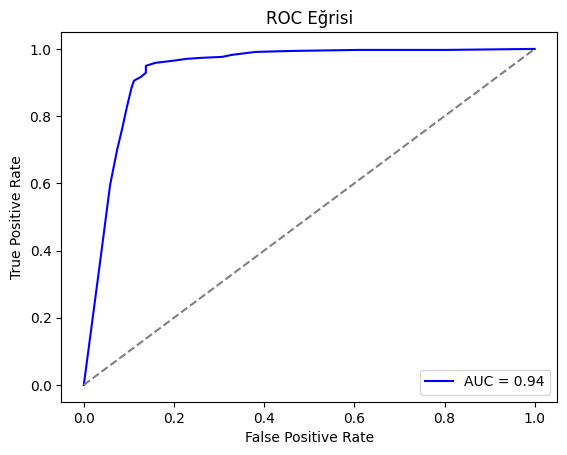

In [ ]:
y_proba_baggingObject = baggingObject.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba_baggingObject)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_baggingObject)
print("AUC:", auc)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

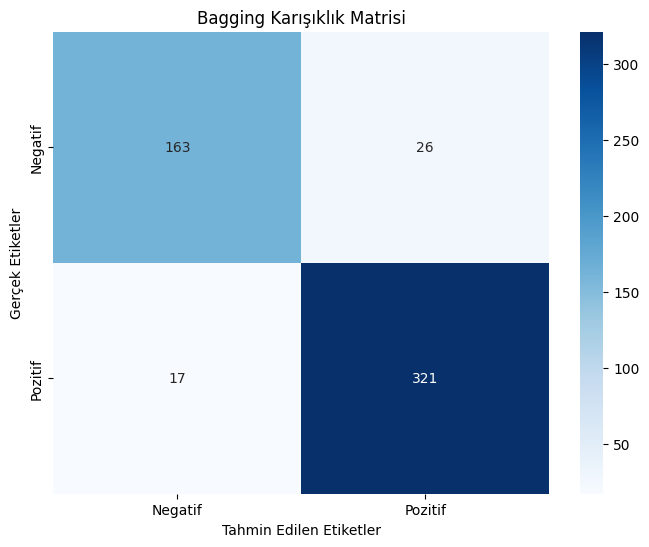

In [ ]:
# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baggingObject, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Bagging Karışıklık Matrisi')
plt.show()

# **STACKING**
* Farklı türde modeller (örneğin Karar Ağacı, SVM, KNN) bir arada kullanılarak bir topluluk modeli oluşturulur. Bu modellerin çıktıları (tahminleri), bir "meta-model" (genelde lojistik regresyon veya başka bir güçlü model) tarafından birleştirilerek nihai tahmin yapılır.
* Bagging'de aynı baz modelin farklı versiyonları bootstrap örnekleme ile eğitilirken, Stacking'de birden fazla farklı model kullanılır.
* Stacking, heterojen modelleri (farklı türde algoritmalar) birleştirirken, Bagging aynı türde modeli birleştirir.

## SVC & KNN & DESİCİON TREEE

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

stacking = StackingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('svm', SVC(probability=True)),  # SVC için probability=True gerekli
        ('knn', KNeighborsClassifier())
    ],
    final_estimator=LogisticRegression()
)

In [ ]:
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('svm', SVC(probability=True)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_stacking = stacking.predict(X_test)

# Doğruluk skoru
accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Doğruluk: {accuracy:.2f}")

Stacking Classifier Doğruluk: 0.91


In [ ]:
from sklearn.metrics import confusion_matrix
cm_stacking  = confusion_matrix(y_test, y_pred_stacking )
print(cm_stacking )

[[156  33]
 [ 14 324]]


In [ ]:
from sklearn import metrics
print("Eğitim verisi doğruluğu:", metrics.accuracy_score(y_train,stacking.predict(X_train)))
print("Test verisi doğruluğu:",metrics.accuracy_score(y_test,y_pred_stacking))

Eğitim verisi doğruluğu: 0.991128010139417
Test verisi doğruluğu: 0.9108159392789373


In [ ]:
print(classification_report(y_test, y_pred_stacking))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       189
           1       0.91      0.96      0.93       338

    accuracy                           0.91       527
   macro avg       0.91      0.89      0.90       527
weighted avg       0.91      0.91      0.91       527



In [ ]:
# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = cm_stacking.ravel()

sensitivity_stacking = TP / (TP + FN)
specificity_stacking = TN / (TN + FP)

print("Duyarlılık (Sensitivity):", sensitivity_stacking)
print("Özgüllük (Specificity):", specificity_stacking)


Duyarlılık (Sensitivity): 0.9585798816568047
Özgüllük (Specificity): 0.8253968253968254


In [ ]:
f1_stacking = f1_score(y_test, y_pred_stacking)
print("F1 Skoru:", f1_stacking)

F1 Skoru: 0.9323741007194245


In [ ]:
kappa_stacking = cohen_kappa_score(y_test, y_pred_stacking)
print("Cohen's Kappa:", kappa_stacking)

Cohen's Kappa: 0.8017417335691931


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

AUC: 0.9454541185310416


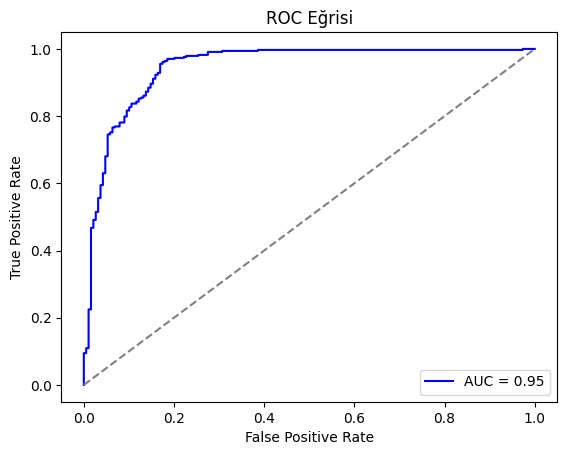

In [ ]:
y_proba_stacking = stacking.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba_stacking)

fpr, tpr, thresholds = roc_curve(y_test, y_proba_stacking)
print("AUC:", auc)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

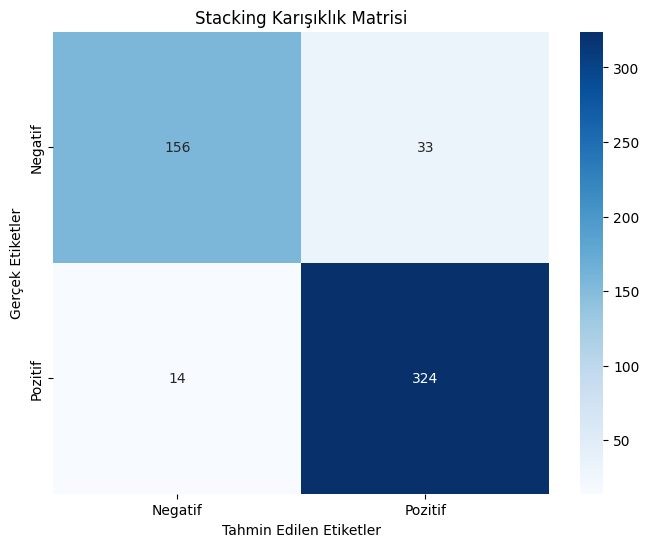

In [64]:
# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Stacking Karışıklık Matrisi')
plt.show()